In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [7]:
#check jika ada missing value
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.values

array([[842302, 'M', 17.99, ..., 0.2654, 0.4601, 0.1189],
       [842517, 'M', 20.57, ..., 0.186, 0.275, 0.08902],
       [84300903, 'M', 19.69, ..., 0.243, 0.3613, 0.08758],
       ...,
       [926954, 'M', 16.6, ..., 0.1418, 0.2218, 0.0782],
       [927241, 'M', 20.6, ..., 0.265, 0.4087, 0.124],
       [92751, 'B', 7.76, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [10]:
df.shape

(569, 32)

<AxesSubplot:>

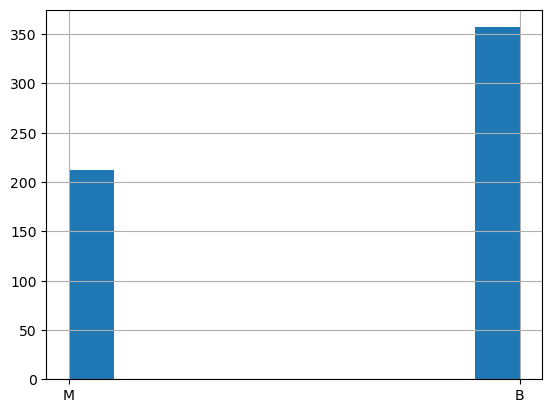

In [11]:
df['diagnosis'].hist()

<AxesSubplot:>

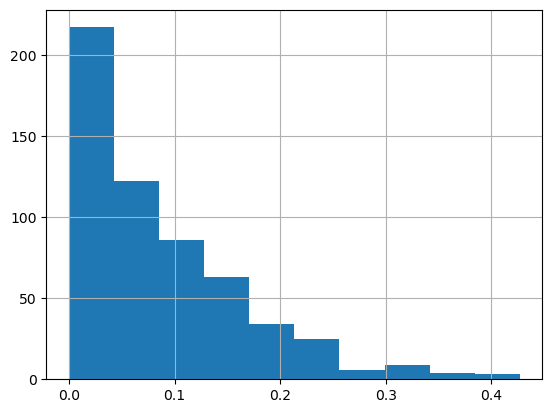

In [12]:
df['concavity_mean'].hist()

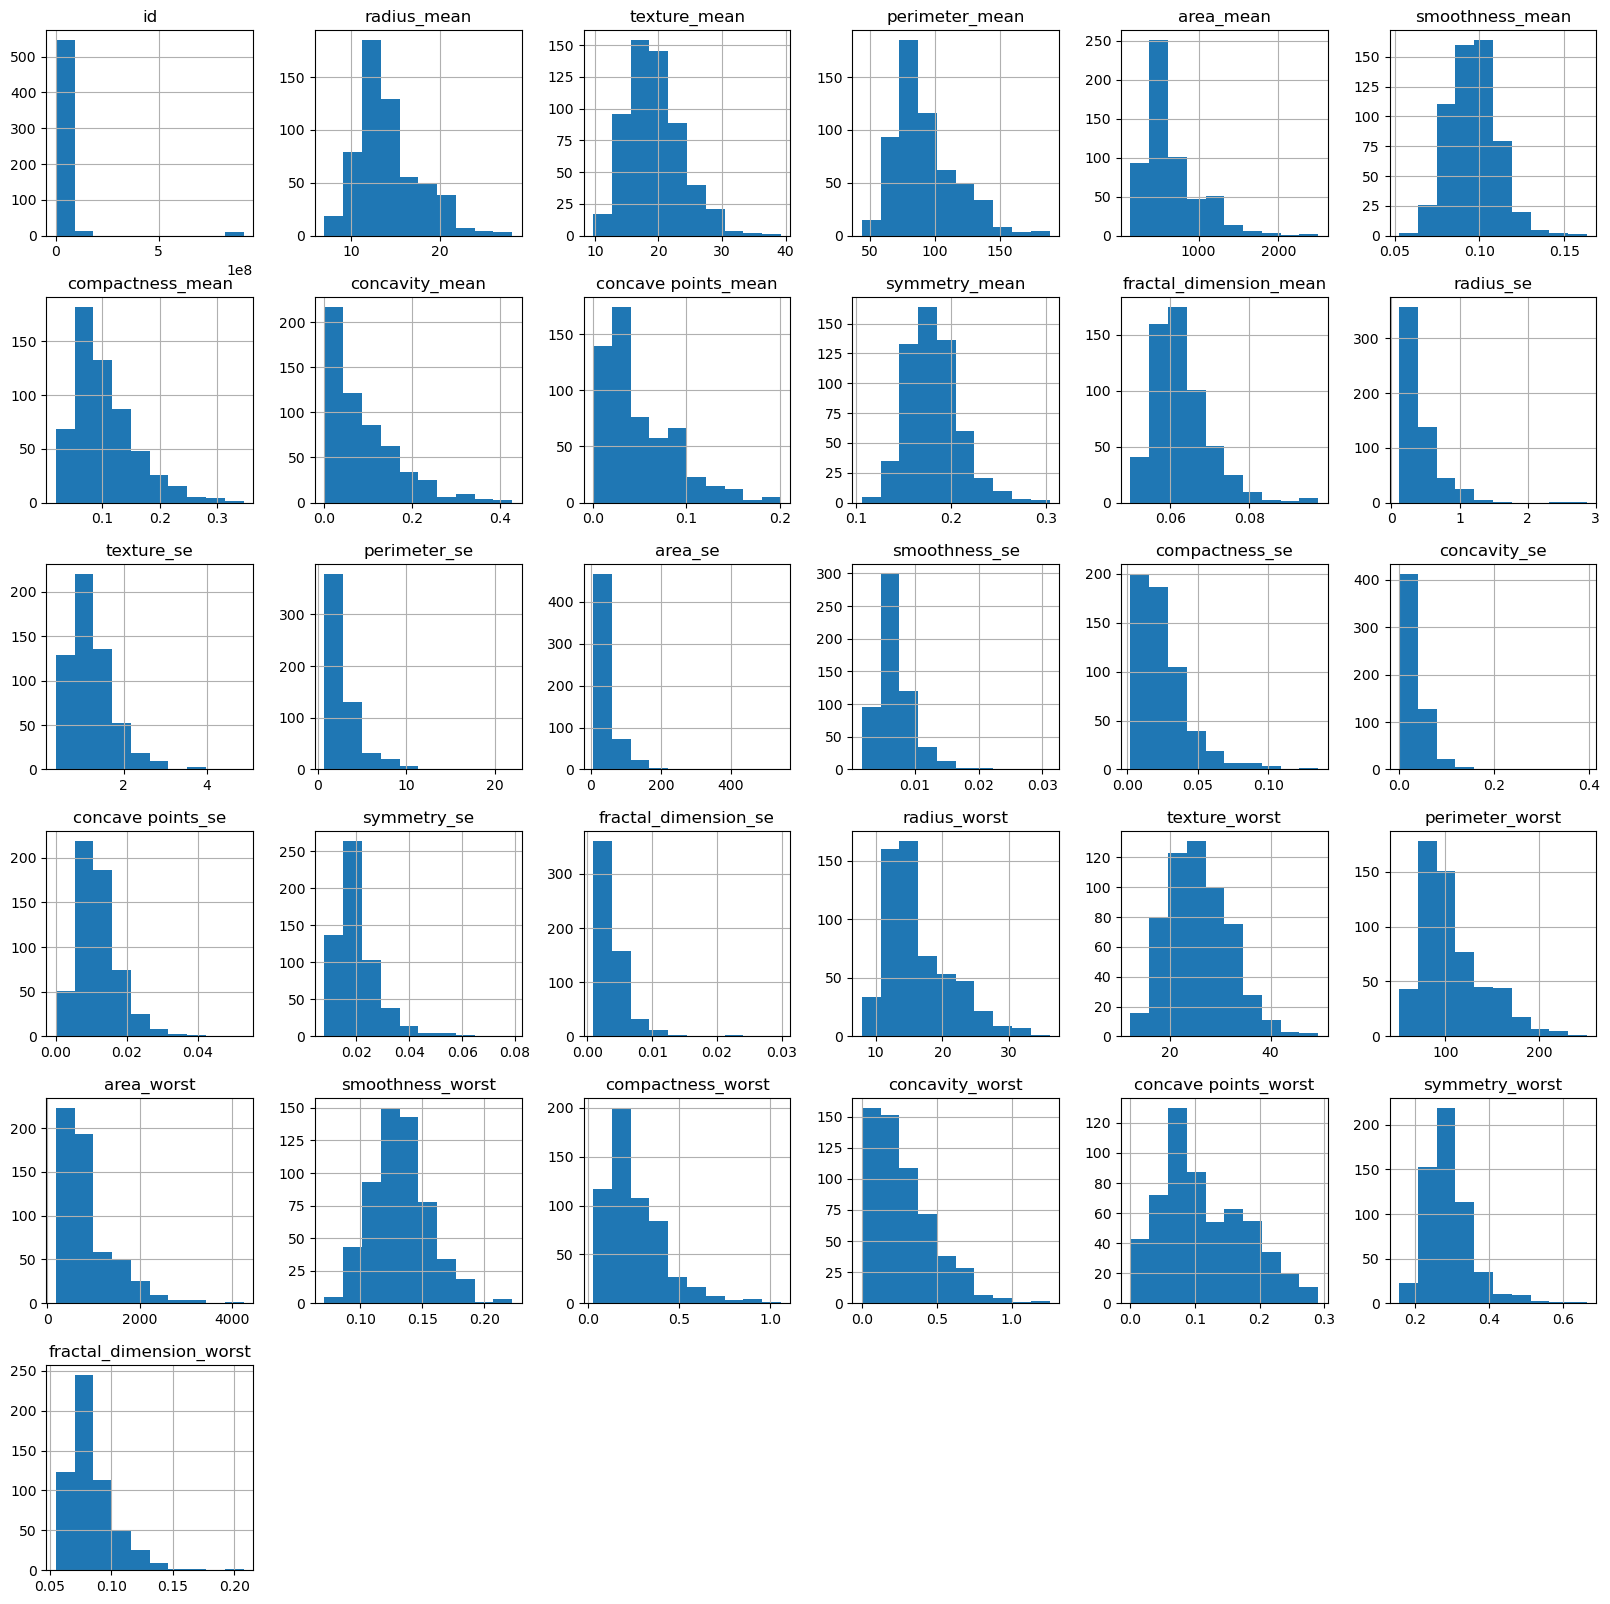

In [13]:
#histogram 
df.hist(figsize=(20, 20))
plt.show()

C:\Users\WAYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

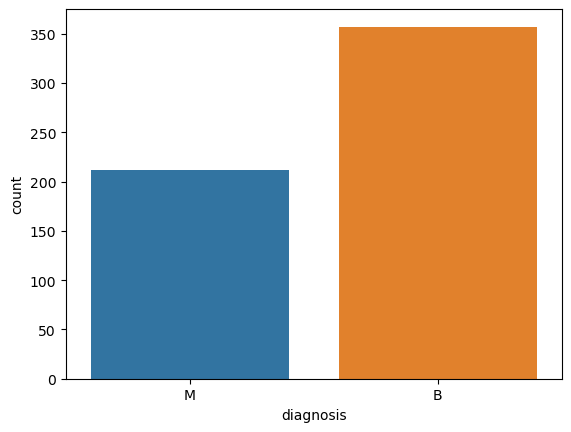

In [14]:
sns.countplot(df['diagnosis'])

Text(0.5, 1.0, 'Correlation Map')

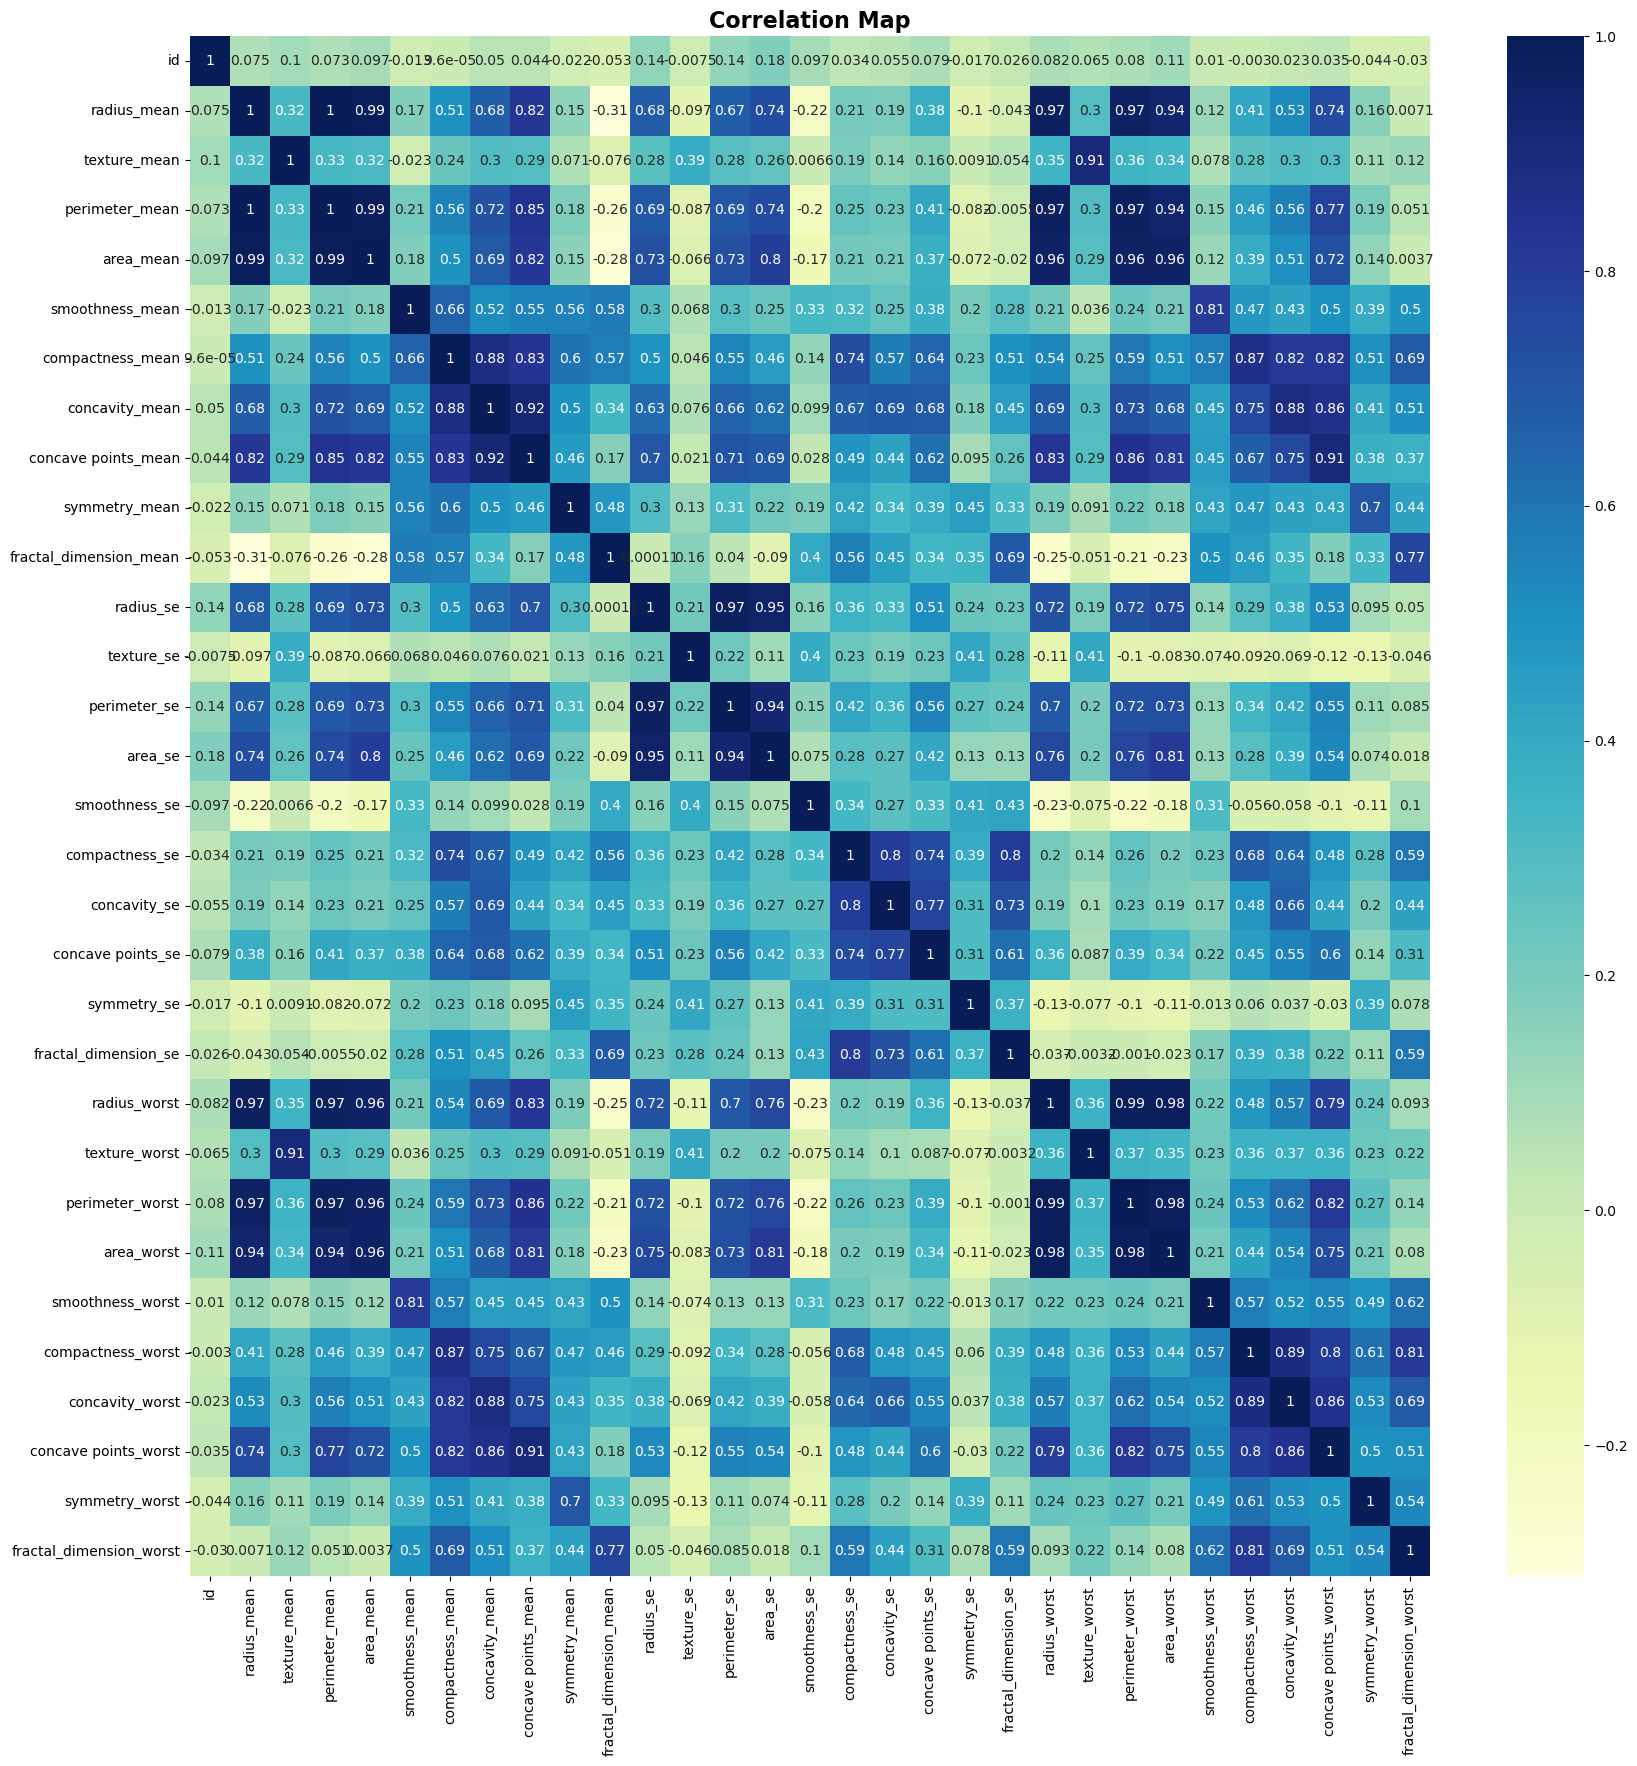

In [15]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [16]:
#Ubah data dengan tipe data object menjadi numerical dengan menggunakan Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
#backup dataset
dataset = df.copy()
#encode categorical data 
ordnl_enc = OrdinalEncoder()
df[['diagnosis']] = ordnl_enc.fit_transform(df[['diagnosis']])

In [17]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        1.0        17.99         10.38          122.80     1001.0   
1    842517        1.0        20.57         17.77          132.90     1326.0   
2  84300903        1.0        19.69         21.25          130.00     1203.0   
3  84348301        1.0        11.42         20.38           77.58      386.1   
4  84358402        1.0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df.drop(['id'],axis=1,inplace=True)

In [20]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         17.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [21]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [22]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [24]:
x_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.08046  ...        10.310          22.65   
181                 0.07398  ...        26.680          33.48   
63                  0.06963  ...        10.010          19.23   
248                 0.06329  ...        12.250          35.19   
60                  0.06960  ...        11.020          17.45   
..                      ...  ...           ...            ...   
71                  0.08980  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50       324.7           0.14820            0.43650   
181           176.50      2089.0           0.14910            0.75840   
63             65.59       310.1           0.09836            0.16780   
248            77.98       455.7           0.14990            0.13980   
60             69.86       368.6           0.12750            0.09866   
..               ...         ...               ...                ...   
71             62.56       284.4           0.12070            0.24360   
106            85.51       521.7           0.16880            0.26600   
270            94.44       684.6           0.08567            0.05036   
435           113.90       869.3           0.16130            0.35680   
102            84.58       547.8           0.11230            0.08862   

     concavity_worst  concave points_worst  symmetry_worst  \
68           1.25200               0.17500          0.4228   
181          0.67800               0.29030          0.4098   
63           0.13970               0.05087          0.3282   
248          0.11250               0.06136          0.3409   
60           0.02168               0.02579          0.3557   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [25]:
y_train

68     0.0
181    1.0
63     0.0
248    0.0
60     0.0
      ... 
71     0.0
106    0.0
270    0.0
435    1.0
102    0.0
Name: diagnosis, Length: 455, dtype: float64

In [26]:
x_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   
..           ...           ...             ...        ...              ...   
486        14.64         16.85           94.21      666.0          0.08641   
75         16.07         19.65          104.10      817.7          0.09168   
249        11.52         14.93           73.87      406.3          0.10130   
238        14.22         27.85           92.55      623.9          0.08223   
265        20.73         31.12          135.70     1419.0          0.09469   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204           0.10580         0.08005              0.03821         0.1925   
70            0.10290         0.10800              0.07951         0.1582   
131           0.12230         0.14660              0.08087         0.1931   
431           0.13160         0.07741              0.02799         0.1811   
540           0.11200         0.06737              0.02594         0.1818   
..                ...             ...                  ...            ...   
486           0.06698         0.05192              0.02791         0.1409   
75            0.08424         0.09769              0.06638         0.1798   
249           0.07808         0.04328              0.02929         0.1883   
238           0.10390         0.11030              0.04408         0.1342   
265           0.11430         0.13670              0.08646         0.1769   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
204                 0.06373  ...         14.97          24.64   
70                  0.05461  ...         24.86          26.58   
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   
540                 0.06782  ...         12.26          19.68   
..                      ...  ...           ...            ...   
486                 0.05355  ...         16.46          25.44   
75                  0.05391  ...         19.77          24.56   
249                 0.06168  ...         12.65          21.19   
238                 0.06129  ...         15.75          40.54   
265                 0.05674  ...         32.49          47.16   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204            96.05       677.9            0.1426             0.2378   
70            165.90      1866.0            0.1193             0.2336   
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   
540            78.78       457.8            0.1345             0.2118   
..               ...         ...               ...                ...   
486           106.00       831.0            0.1142             0.2070   
75            128.80      1223.0            0.1500             0.2045   
249            80.88       491.8            0.1389             0.1582   
238           102.50       764.0            0.1081             0.2426   
265           214.00      3432.0            0.1401             0.2644   

     concavity_worst  concave points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   
..               ...                   ...             ...   
486           0.2437               0.07828         

In [27]:
y_test

204    0.0
70     1.0
131    1.0
431    0.0
540    0.0
      ... 
486    0.0
75     1.0
249    0.0
238    0.0
265    1.0
Name: diagnosis, Length: 114, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [29]:
y_predict = forest_model.predict(x_test)
y_predict

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

In [30]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[70,  1],
       [ 3, 40]], dtype=int64)

<AxesSubplot:>

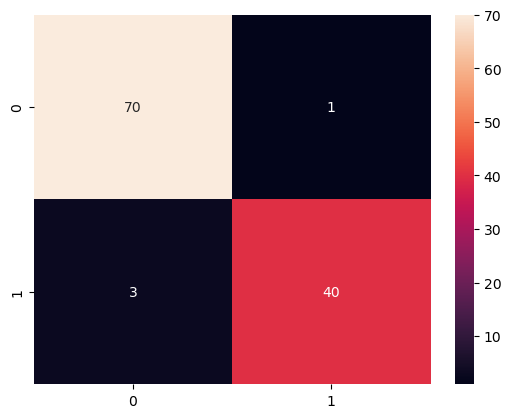

In [31]:
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
print("accuracy : ", forest_model.score(x_test,y_test))

accuracy :  0.9649122807017544


In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [38]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [39]:
rf_Model = RandomForestClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [41]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [42]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [44]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.989
Test Accuracy - : 0.956


In [45]:
import pickle
Pkl_Filename = "forest_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(forest_model, file)

In [46]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

RandomForestClassifier(random_state=0)